## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, Markdown

sns.set_theme(style="darkgrid")
pd.set_option('display.max_columns', None)  

import sys, os, yaml

DATASET = "Exercises Datasets"
COLAB = 'google.colab' in sys.modules

DEBUG = False
SEED = 666

In [2]:
COLAB = 'google.colab' in sys.modules

if COLAB:
  from google.colab import drive
  if not os.path.isdir("/content/gdrive"):
    drive.mount("/content/gdrive")
    d = "/content/gdrive/MyDrive/datasets"
    if not os.path.isdir(ROOT+d): os.makedirs(ROOT+d)
  ROOT = f"/content/gdrive/MyDrive/datasets/{DATASET.replace(' ','_')}/"
  if not os.path.isdir(ROOT): os.makedirs(ROOT)
else:
  ROOT = "./"

def makedirs(d):
  if COLAB:
    if not os.path.isdir(ROOT+d): os.makedirs(ROOT+d)
  else:
    if not os.path.isdir(ROOT+d): os.makedirs(ROOT+d, mode=0o777, exist_ok=True)

for d in ['orig','data','output']: makedirs(d)

## Load

Escolha alguns datasets, à seu critério, para trabalhar.

In [3]:
df1 = pd.read_pickle(f"{ROOT}/data/dart.pickle")
df2 = pd.read_pickle(f"{ROOT}/data/ring.pickle")
df3 = pd.read_pickle(f"{ROOT}/data/wave.pickle")

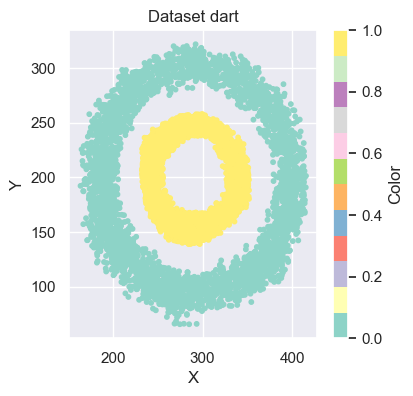

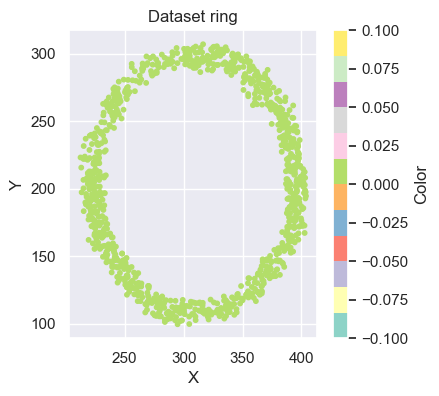

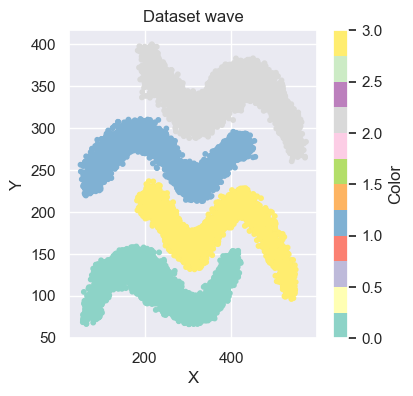

In [4]:
plt.figure(figsize=(4, 4))
plt.title('Dataset dart')
plt.scatter(df1['x'], df1['y'], c=df1['color'], s=10, cmap="Set3")
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='Color')
plt.grid(True)
plt.show()

plt.figure(figsize=(4, 4))
plt.title('Dataset ring')
plt.scatter(df2['x'], df2['y'], c=df2['color'], s=10, cmap="Set3")
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='Color')
plt.grid(True)
plt.show()

plt.figure(figsize=(4, 4))
plt.title('Dataset wave')
plt.scatter(df3['x'], df3['y'], c=df3['color'], s=10, cmap="Set3")
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='Color')
plt.grid(True)
plt.show()

## Pre-Processing

In [5]:
df1 = df1.copy()
df2 = df2.copy()
df3 = df3.copy()

In [6]:
df1.drop(['color'], axis = 1, inplace =True)
df2.drop(['color'], axis = 1, inplace =True)
df3.drop(['color'], axis = 1, inplace =True)

## Elbow

Nesses datasets nós já temos os Clusters ideais, então fica facultativo usar o Elbow ou outro método para definição do K.

Você pode contar quantas cores/clusters o dataset possui. 

In [7]:
from sklearn.cluster import KMeans

In [8]:
import warnings
warnings.filterwarnings(action="ignore")

In [9]:
# Conta o número de clusters únicos
def count_clusters_kmeans(df, dataset_name, n_clusters=6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=SEED)
    df['color'] = kmeans.fit_predict(df)  
    num_clusters = df['color'].nunique()  
    print(f"O número de clusters no dataset {dataset_name} é: {num_clusters}")

count_clusters_kmeans(df1[['x', 'y']], "dart")
count_clusters_kmeans(df2[['x', 'y']], "ring")
count_clusters_kmeans(df3[['x', 'y']], "wave")

O número de clusters no dataset dart é: 6
O número de clusters no dataset ring é: 6
O número de clusters no dataset wave é: 6


In [10]:
from yellowbrick.cluster import KElbowVisualizer

Dataset dart:


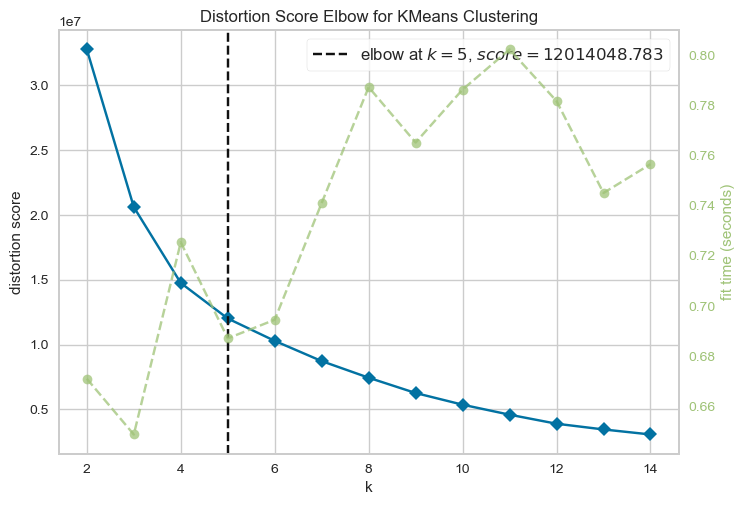

Dataset ring:


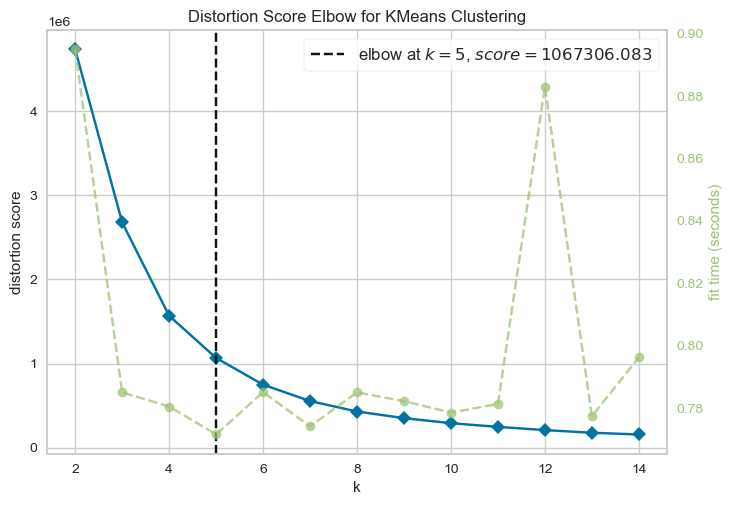

Dataset wave:


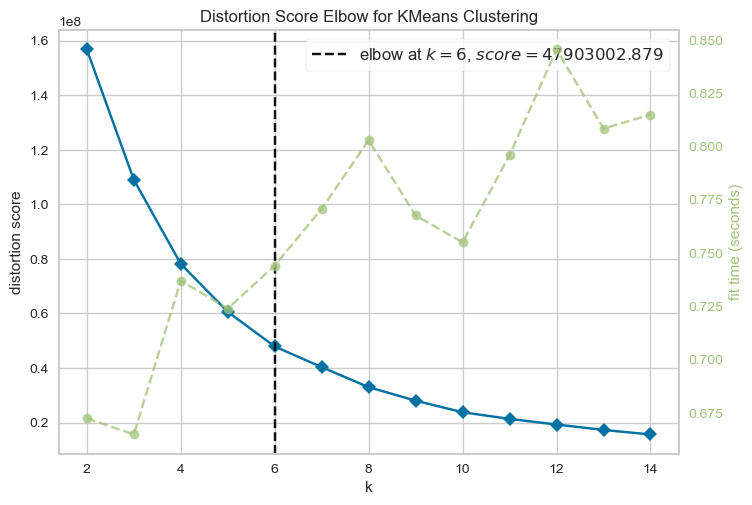

In [11]:
def elbow_visualizer(dataframe, k_range=(2, 15)):
    model = KMeans(init='k-means++', random_state=42)
    visualizer = KElbowVisualizer(model, k=k_range, timings=True)
    visualizer.fit(dataframe)
    visualizer.show()

print('Dataset dart:')
elbow_visualizer(df1, k_range=(2, 15))
print('Dataset ring:')
elbow_visualizer(df2, k_range=(2, 15))
print('Dataset wave:')
elbow_visualizer(df3, k_range=(2, 15))


In [79]:
from yellowbrick.cluster import KElbowVisualizer

Dataset dart:


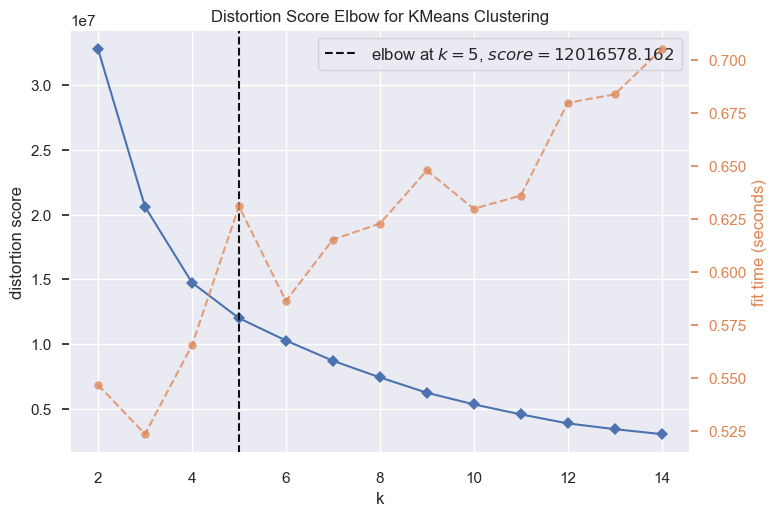

Dataset ring:


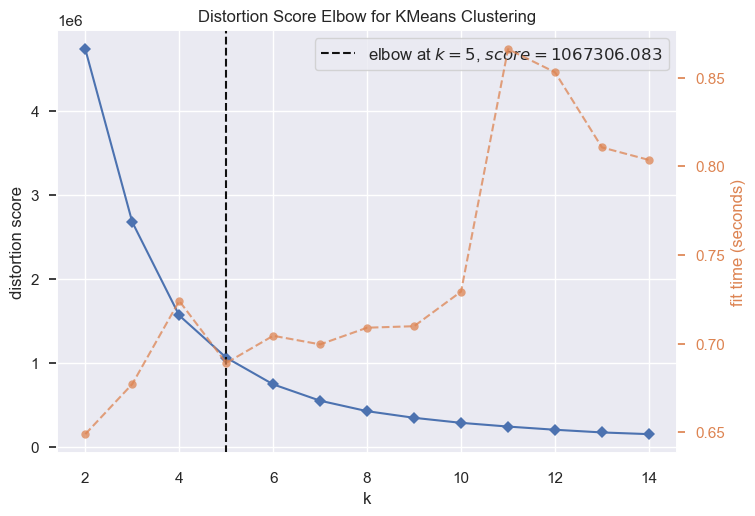

Dataset wave:


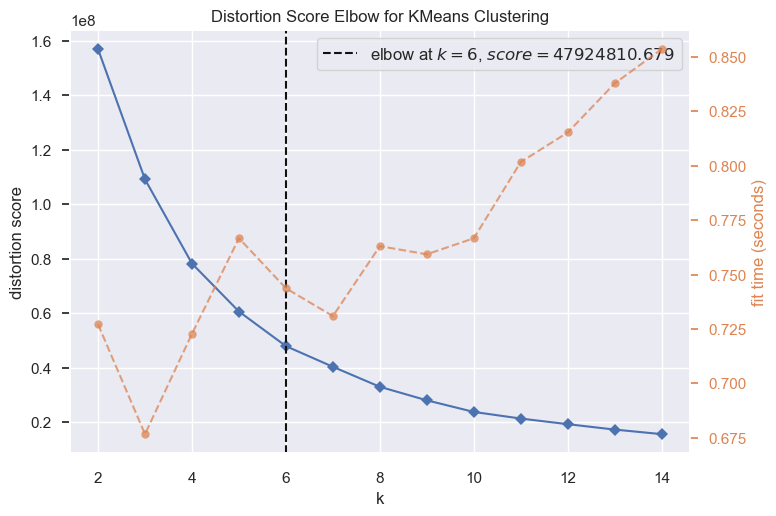

In [85]:
def elbow_visualizer(dataframe, k_range=(2, 15)):
    model = KMeans(init='k-means++', random_state=42)
    visualizer = KElbowVisualizer(model, k=k_range, timings=True)
    visualizer.fit(dataframe)
    visualizer.show()

print('Dataset dart:')
elbow_visualizer(df1, k_range=(2, 15))
print('Dataset ring:')
elbow_visualizer(df2, k_range=(2, 15))
print('Dataset wave:')
elbow_visualizer(df3, k_range=(2, 15))


## Models

Vimos em aula o Kmeans

Tente também implementar os outros metodos e compare os resultados fazendo o plot do df_original (com as cores dos clusters ideais) e ao lado o plot com os clusters dos modelos

In [12]:
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture

In [13]:
def count_clusters(dataframe, dataset_name, n_clusters=6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(dataframe[['x', 'y']])

    dataframe['color'] = labels

    num_clusters = dataframe['color'].nunique()
    print(f"O número de clusters no dataset {dataset_name} é: {num_clusters}")

def plot_clusters(dataframe, labels, title):
    plt.figure(figsize=(6, 6))
    plt.scatter(dataframe['x'], dataframe['y'], c=labels, s=10, cmap="Set3")
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.colorbar(label='Cluster')
    plt.grid(True)
    plt.show()

O número de clusters no dataset dart é: 6


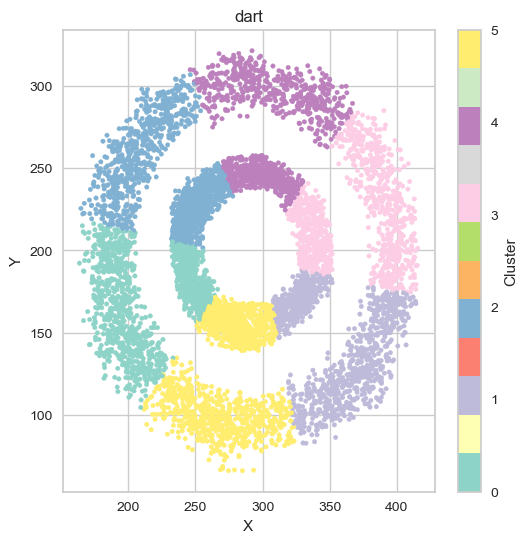

O número de clusters no dataset ring é: 6


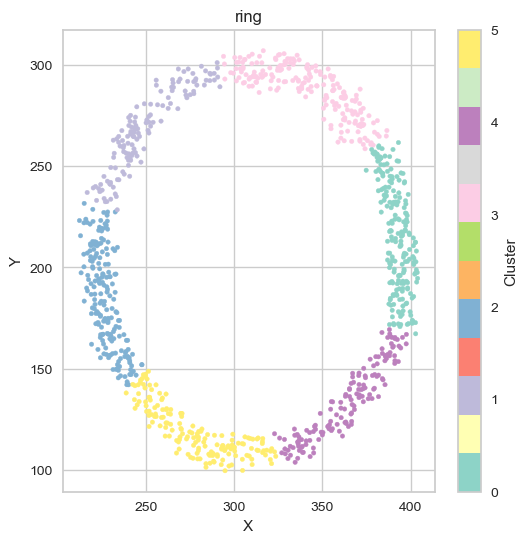

O número de clusters no dataset wave é: 6


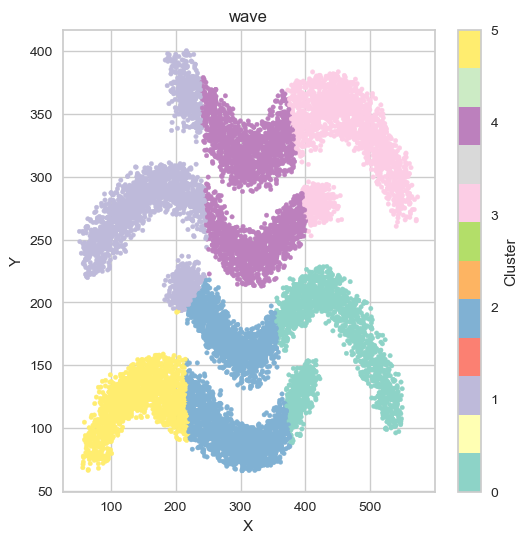

In [14]:
count_clusters(df1, "dart", n_clusters=6)
plot_clusters(df1, df1['color'], "dart")

count_clusters(df2, "ring", n_clusters=6)
plot_clusters(df2, df2['color'], "ring")

count_clusters(df3, "wave", n_clusters=6)
plot_clusters(df3, df3['color'], "wave")

### Clustering Aglomerativo

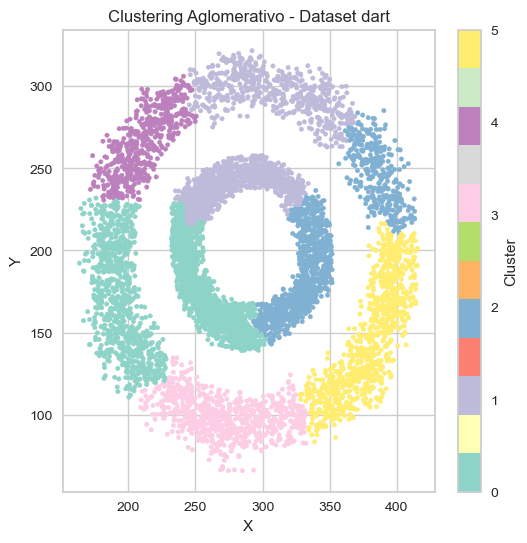

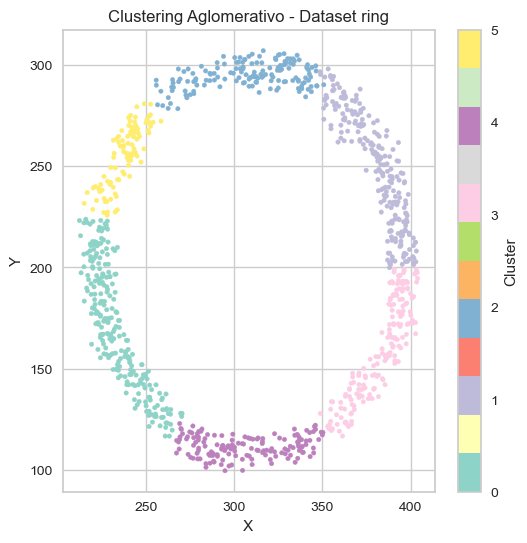

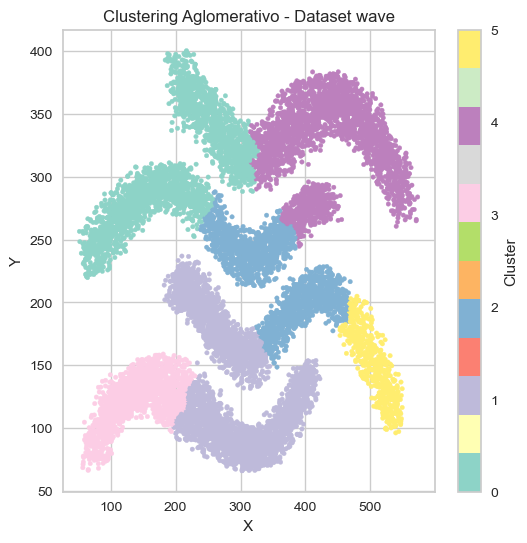

In [15]:
agg_dart = AgglomerativeClustering(n_clusters=6)
agg_ring = AgglomerativeClustering(n_clusters=6)
agg_wave = AgglomerativeClustering(n_clusters=6)

df1['agg_labels'] = agg_dart.fit_predict(df1[['x', 'y']])
df2['agg_labels'] = agg_ring.fit_predict(df2[['x', 'y']])
df3['agg_labels'] = agg_wave.fit_predict(df3[['x', 'y']])

plot_clusters(df1, df1['agg_labels'], 'Clustering Aglomerativo - Dataset dart')
plot_clusters(df2, df2['agg_labels'], 'Clustering Aglomerativo - Dataset ring')
plot_clusters(df3, df3['agg_labels'], 'Clustering Aglomerativo - Dataset wave')

### Clustering DBSCAN

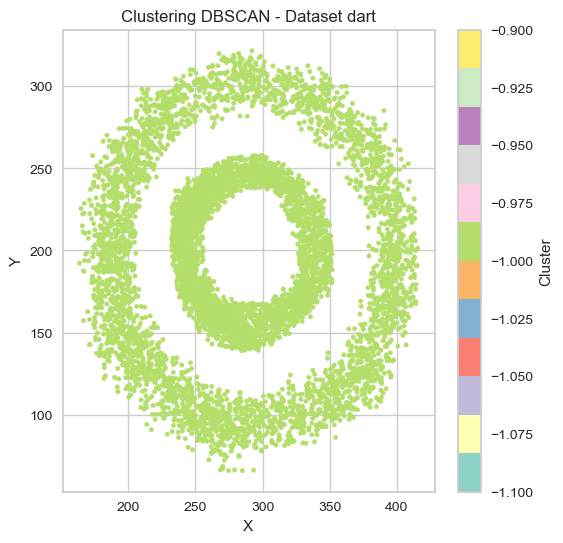

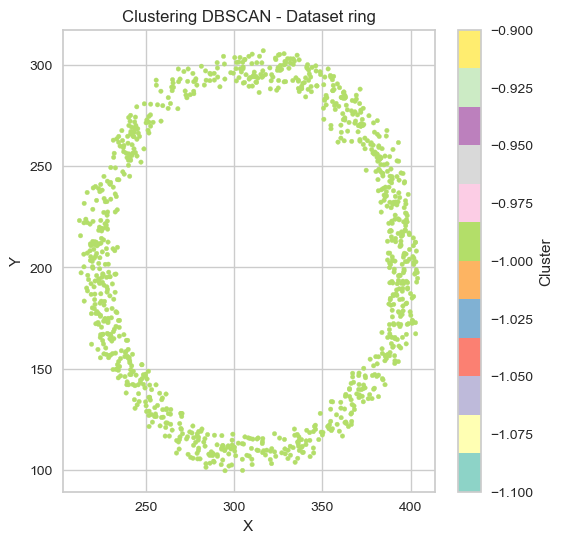

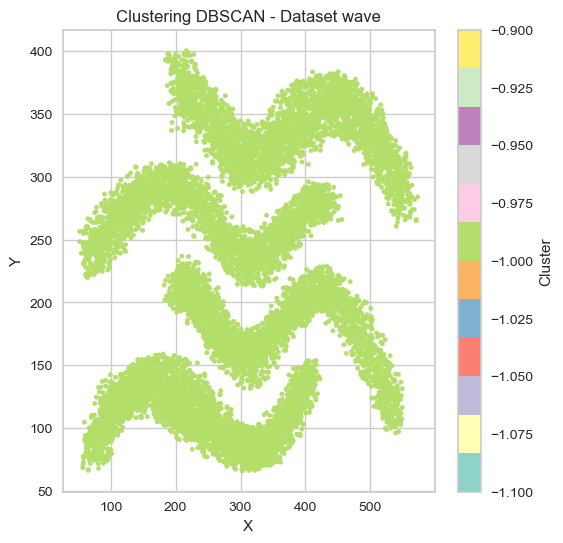

In [16]:
dbscan_dart = DBSCAN(eps=0.3, min_samples=5)
dbscan_ring = DBSCAN(eps=0.1, min_samples=5)
dbscan_wave = DBSCAN(eps=0.2, min_samples=5)

df1['dbscan_labels'] = dbscan_dart.fit_predict(df1)
df2['dbscan_labels'] = dbscan_ring.fit_predict(df2)
df3['dbscan_labels'] = dbscan_wave.fit_predict(df3)

plot_clusters(df1, df1['dbscan_labels'], 'Clustering DBSCAN - Dataset dart')
plot_clusters(df2, df2['dbscan_labels'], 'Clustering DBSCAN - Dataset ring')
plot_clusters(df3, df3['dbscan_labels'], 'Clustering DBSCAN - Dataset wave')

### Clustering Gaussian Mixture

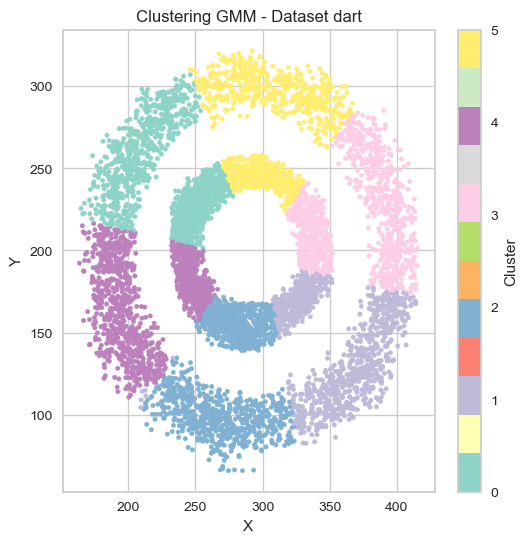

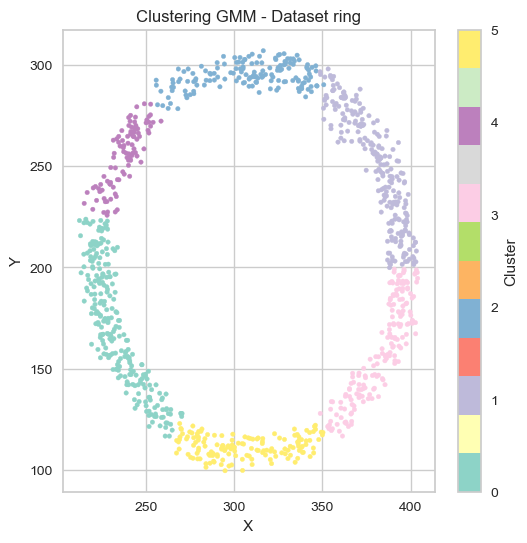

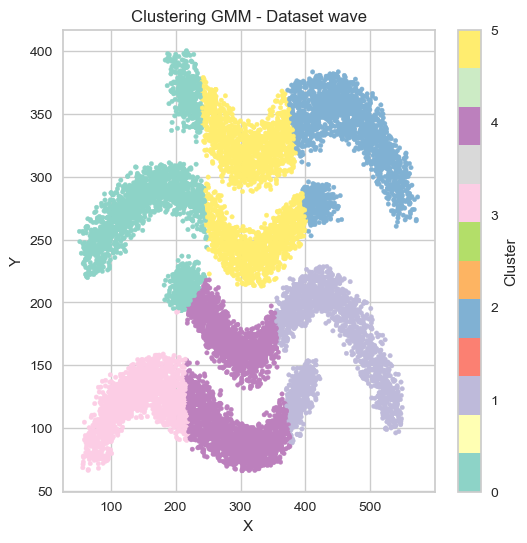

In [17]:
gmm_dart = GaussianMixture(n_components=6, random_state=SEED)
gmm_ring = GaussianMixture(n_components=6, random_state=SEED)
gmm_wave = GaussianMixture(n_components=6, random_state=SEED)

df1['gmm_labels'] = gmm_dart.fit_predict(df1)
df2['gmm_labels'] = gmm_ring.fit_predict(df2)
df3['gmm_labels'] = gmm_wave.fit_predict(df3)

plot_clusters(df1, df1['gmm_labels'], 'Clustering GMM - Dataset dart')
plot_clusters(df2, df2['gmm_labels'], 'Clustering GMM - Dataset ring')
plot_clusters(df3, df3['gmm_labels'], 'Clustering GMM - Dataset wave')

## Results

Comente sobre a performance das diferentes técnicas

### Qual é o propósito principal de usar técnicas de clustering em aprendizado de máquina?

O propósito principal de usar técnicas de clustering em aprendizado de máquina é agrupar dados não rotulados em grupos (clusters) de modo que itens no mesmo grupo sejam mais similares entre si do que aos de outros grupos, ajudando na identificação de padrões e estrutura nos dados.

### Quais são algumas das métricas comuns usadas para avaliar a qualidade de um cluster?


Algumas métricas comuns usadas para avaliar a qualidade de um cluster incluem o Silhouette Score, que avalia o quão bem cada ponto se ajusta ao seu próprio cluster em comparação com outros clusters; o Davies-Bouldin Index, que mede a média das razões entre a soma das distâncias intra-cluster e a distância inter-cluster; e a Inertia, que mede a soma das distâncias quadráticas entre pontos e o centro do cluster, entre outras métricas.

### Como você decide o número ideal de clusters a serem usados em um determinado conjunto de dados?

Para decidir o número ideal de clusters, você pode usar métodos como o "Método do Cotovelo", que analisa a variação da inércia em função do número de clusters, ou o "Silhouette Score", que avalia a qualidade dos clusters para diferentes números de grupos.

https://www.kaggle.com/code/marcinrutecki/clustering-methods-comprehensive-study#2.-Set-up